R-squared (Linear Regression): 0.5845623581885104
Mean Squared Error (MSE): 0.4261503654808522
Mean Absolute Error (MAE): 0.34974858147014676


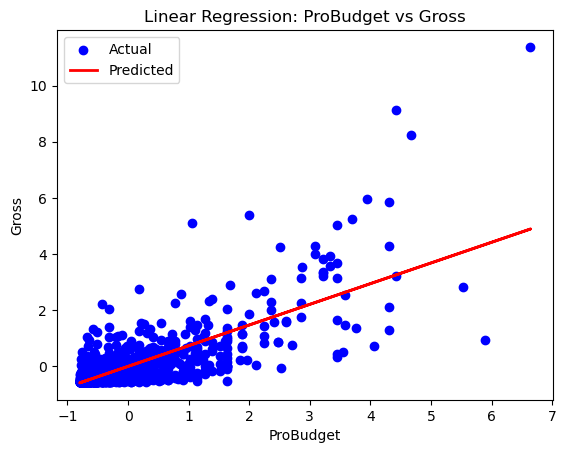

R-squared (Polynomial Regression): 0.6167614624796773
Mean Squared Error (MSE) for Polynomial Regression: 0.39312095581541023
Mean Absolute Error (MAE) for Polynomial Regression: 0.343144967455765


Enter a value for ProBudget:  2000


Predicted Gross for ProBudget 2000.0: 1472.7244921593813


/root/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Load the dataset
data = pd.read_csv('movieset.csv')

# Handling missing values (if any)
data.dropna(inplace=True)  # Drop rows with missing values or use imputation techniques

# Convert 'ProBudget' and 'Gross' columns to numeric (remove commas and convert to float)
data['ProBudget'] = data['ProBudget'].replace(',', '', regex=True).astype(float)
data['Gross'] = data['Gross'].replace(',', '', regex=True).astype(float)

# Feature scaling if necessary
scaler = StandardScaler()
data[['ProBudget', 'Gross']] = scaler.fit_transform(data[['ProBudget', 'Gross']])

# Assuming 'ProBudget' is the feature and 'Gross' is the target variable
X = data[['ProBudget']]  # Feature(s)
X.columns = ['ProBudget']  # Assigning feature names
# Feature(s)
y = data['Gross']  # Target variable

# Linear Regression

# Split the data into training and testing sets for linear regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Evaluation metrics - R-squared, MSE, MAE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared (Linear Regression): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Plotting the regression line along with the actual and predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual')  # Actual data points
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')  # Predicted values
plt.xlabel('ProBudget')
plt.ylabel('Gross')
plt.title('Linear Regression: ProBudget vs Gross')
plt.legend()
plt.show()

# Polynomial Regression

# Create polynomial features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets for polynomial regression
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create a Linear Regression model with polynomial features
model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)

# Predictions using the testing set with polynomial features
y_pred_poly = model_poly.predict(X_poly_test)

# Evaluation metrics for polynomial regression
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

print(f"R-squared (Polynomial Regression): {r2_poly}")
print(f"Mean Squared Error (MSE) for Polynomial Regression: {mse_poly}")
print(f"Mean Absolute Error (MAE) for Polynomial Regression: {mae_poly}")

# Visualization for Polynomial Regression (similar to linear regression)

# User Input and Predictions
user_input = float(input("Enter a value for ProBudget: "))  # Accepting user input for ProBudget
user_pred = model.predict([[user_input]])  # Predicting Gross based on user input

print(f"Predicted Gross for ProBudget {user_input}: {user_pred[0]}")
